In [1]:
import pandas as pd

In [2]:
import os


In [3]:
pwd = os.getcwd()
head, tail = os.path.split(pwd)
listing_data = os.path.join(head, "data/raw/bkk_listings.csv")
df = pd.read_csv(listing_data)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1665.0,15,65,2024-09-17,0.41,1,362,1,NaN
1,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,NaN,1,0,NaN,NaN,2,0,0,NaN
2,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,NaN,60,0,NaN,NaN,1,0,0,NaN
3,47516,Beautiful waterfront house,214456,Anuradha,NaN,Don Mueang,13.92726,100.58529,Entire home/apt,4373.0,3,0,NaN,NaN,1,364,0,NaN
4,48736,Condo with Chaopraya River View,222005,Athitaya,NaN,Rat Burana,13.68556,100.49535,Private room,1930.0,14,1,2014-02-03,0.01,1,365,0,NaN


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
# looking at columns - listing important columns for pricing suggestion based on neighbourhood

imp_cols = [
    "neighbourhood",
    "room_type",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "number_of_reviews_ltm",
]


In [13]:
df_filt = df[imp_cols]

#### NULL Handling


In [14]:
df_filt.isna().sum()

neighbourhood                        0
room_type                            0
price                             5390
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9466
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [22]:
# droping rows where availability is 0 and prices are missing.

df_filt = df_filt.drop(
    df_filt[(df_filt["availability_365"] == 0) & df_filt["price"].isna()].index
)

In [27]:
df_filt = df_filt.drop(df_filt[df_filt["price"].isna()].index)

#### Neighbourhood Deduction


In [33]:
df_filt.groupby(["neighbourhood"])["price"].median()

neighbourhood
Bang Bon                 941.5
Bang Kapi                933.0
Bang Khae                871.5
Bang Khen                857.5
Bang Kho laen           1032.0
Bang Khun thain         1015.5
Bang Na                  989.0
Bang Phlat               792.0
Bang Rak                1872.5
Bang Sue                 854.5
Bangkok Noi              868.5
Bangkok Yai             1400.0
Bueng Kum               1050.0
Chatu Chak              1184.0
Chom Thong               963.0
Din Daeng               1250.0
Don Mueang               800.0
Dusit                   1019.0
Huai Khwang             1500.0
Khan Na Yao              951.0
Khlong Sam Wa            879.0
Khlong San              1185.0
Khlong Toei             1725.0
Lak Si                   784.0
Lat Krabang             1200.0
Lat Phrao               1594.0
Min Buri                 811.5
Nong Chok               1680.0
Nong Khaem               925.0
Parthum Wan             2450.0
Phasi Charoen            943.0
Phaya Thai              1

In [38]:
df_filt[df_filt["neighbourhood"] == "Ratchathewi"].groupby("minimum_nights")[
    "price"
].agg(["mean", "count", "median"])

,mean,count,median
minimum_nights,,,
1,4158.371197,493,1534.0
2,2406.975610,82,1758.0
3,2509.568182,44,1702.0
4,2372.800000,20,2345.0
5,2522.166667,12,1600.5
6,1860.500000,2,1860.5
7,3488.214286,14,1941.5
9,9275.000000,1,9275.0
10,2884.076923,13,2780.0


In [39]:
bins = [0, 3, 7, 30, 365]

In [40]:
df_filt["minimum_nights_bin"] = pd.cut(df_filt["minimum_nights"], bins=bins)

In [58]:
df_filt = df_filt[~df_filt["availability_365"] <= 150]

In [59]:
df_filt.groupby(["neighbourhood"])["availability_365"].agg(
    ["mean", "count", "median", "std"]
)

,mean,count,median,std
neighbourhood,,,,
Bang Bon,307.800000,10,359.0,116.173051
Bang Kapi,280.074499,349,328.0,98.012814
Bang Khae,299.550000,60,355.0,93.931353
Bang Khen,266.698276,116,333.5,121.333476
Bang Kho laen,294.756757,148,334.0,83.565822
Bang Khun thain,284.500000,22,339.5,107.001001
Bang Na,258.617476,515,301.0,110.221158
Bang Phlat,276.059299,371,273.0,94.900982
Bang Rak,252.034884,774,278.5,107.621276


In [ ]:
df_filt.groupby(["minimum_nights_bin", "room_type"])["price"].agg(
    ["mean", "count", "median", "std"]
)

Final so


In [55]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


(array([ 1466.,  2523.,  3128.,  3761., 11280.]),
 array([  0.,  73., 146., 219., 292., 365.]),
 <BarContainer object of 5 artists>)

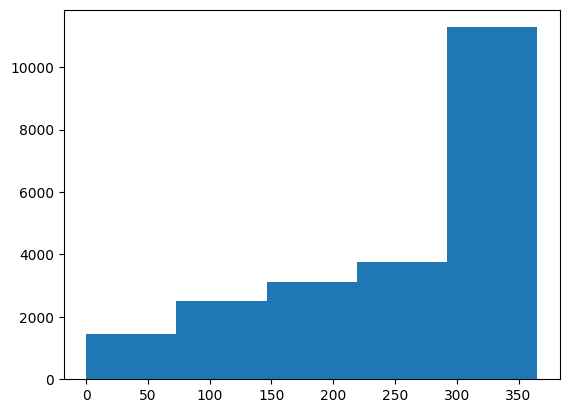

In [56]:
plt.hist(df_filt["availability_365"], bins=5)

In [60]:
df_filt[df_filt["availability_365"] < 150]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,minimum_nights_bin
12,Bang Rak,Entire home/apt,1090.0,7,76,0.47,1,148,8,"(3, 7]"
21,Ratchathewi,Entire home/apt,841.0,90,96,0.63,1,108,1,"(30, 365]"
28,Vadhana,Entire home/apt,3633.0,7,14,0.09,1,84,0,"(3, 7]"
36,Sathon,Private room,1472.0,1,14,0.10,4,0,0,"(0, 3]"
47,Thung khru,Entire home/apt,2000.0,29,3,0.02,23,78,0,"(7, 30]"
...,...,...,...,...,...,...,...,...,...,...
27491,Khlong Toei,Entire home/apt,2417.0,3,0,NaN,10,84,0,"(0, 3]"
27495,Bang Sue,Entire home/apt,872.0,5,0,NaN,6,91,0,"(3, 7]"
27501,Huai Khwang,Entire home/apt,2900.0,5,0,NaN,3,91,0,"(3, 7]"
27503,Huai Khwang,Entire home/apt,4160.0,1,0,NaN,4,81,0,"(0, 3]"
